In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

Scaled image size: 320x240


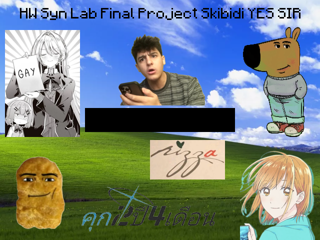

In [2]:
max_width = 320
max_height = 240
max_dim = (max_width, max_height)

img = Image.open("images/background-final.png")

img.thumbnail(max_dim)
img = img.convert("RGB")

img_width, img_height = img.size
print(f"Scaled image size: {img_width}x{img_height}")

padded_img = Image.new("RGB", max_dim, (0, 0, 0))
padded_img.paste(img, (0, 0))

# Calculate the top-left corner to paste the resized image (centering)
offset_x = (max_width - img_width) // 2
offset_y = (max_height - img_height) // 2
    
# Paste the resized image onto the centered black frame
centered_img = Image.new("RGB", max_dim, (0, 0, 0))
centered_img.paste(img, (offset_x, offset_y))

# Convert image to a numpy array
pixel_data = np.array(centered_img)

display(centered_img)

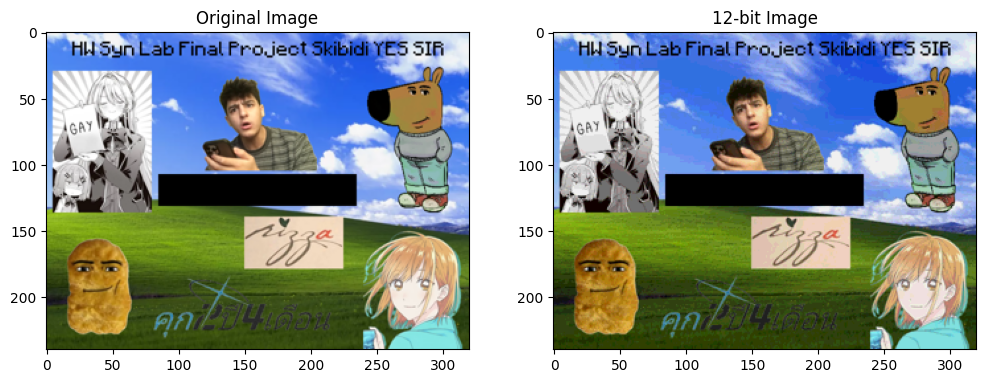

In [3]:
# Convert to 12-bit (this FPGA noob)

fpga_pixel_data = pixel_data / 16

# Display Image to show different

fpga_img = Image.fromarray(np.uint8(fpga_pixel_data) * 16)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(centered_img)
axes[0].set_title('Original Image')

axes[1].imshow(fpga_img)
axes[1].set_title('12-bit Image')

plt.show()

In [ ]:
# Encode to FPGA RAM

encoded_data = []
ram_file = "bg.mem"

for row in fpga_pixel_data:
    for pixel in row:
        r, g, b = pixel
        encoded_data.append((int(r) << 8) | (int(g) << 4) | int(b))
    
    # Write the encoded data to the RAM file
with open(ram_file, "w") as f:
    for i, data in enumerate(encoded_data):
        f.write(f"{data:012b}\n")  # Format: RGB_data;
    
print(f"Encoded image saved to {ram_file}")

Encoded image saved to bg.mem
